In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_20184\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Time/sec     1048571 non-null  object 
 1   Potential/V  1048571 non-null  float64
 2   Current/A    1048571 non-null  float64
 3   Charge/C     1048571 non-null  float64
dtypes: float64(3), object(1)
memory usage: 32.0+ MB


In [6]:
df.shape

(1048571, 4)

In [7]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [8]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [9]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [10]:
# df.drop(['Time'], axis=1,inplace=True)  # deleting the Time column

In [11]:
# df['Time'].iloc[994881]

In [12]:
df.shape

(994879, 4)

In [13]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [14]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

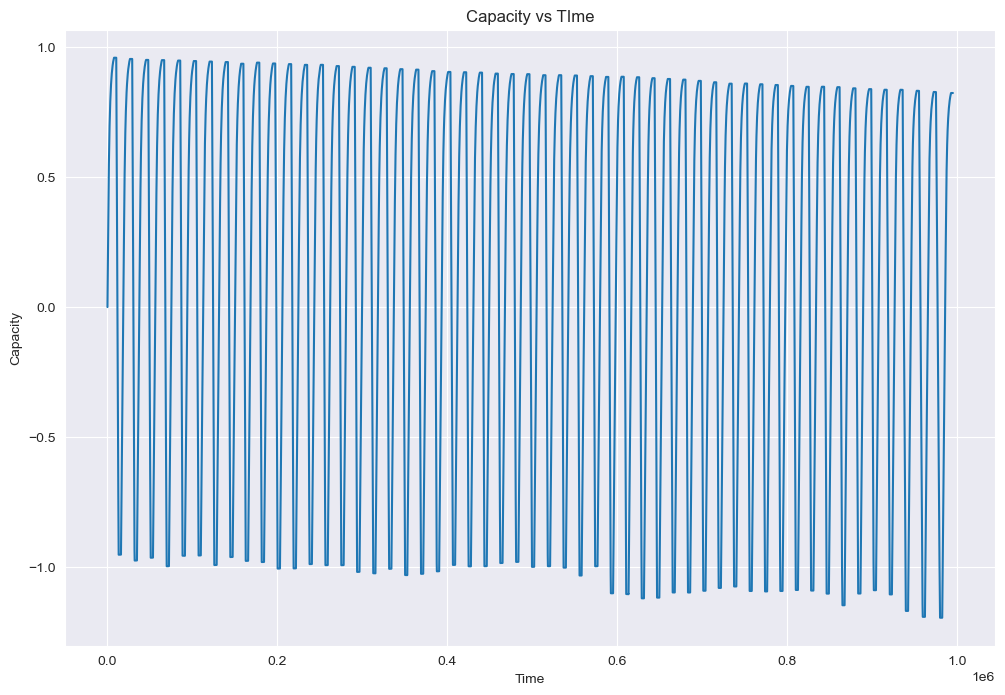

In [16]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Data Cleaning

In [17]:
# df.fillna(value=0, inplace=True)

In [18]:
# df.isnull().sum()

In [19]:
# df.info()

# Local Maxima and Minima

CPU times: total: 3min 52s
Wall time: 3min 57s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

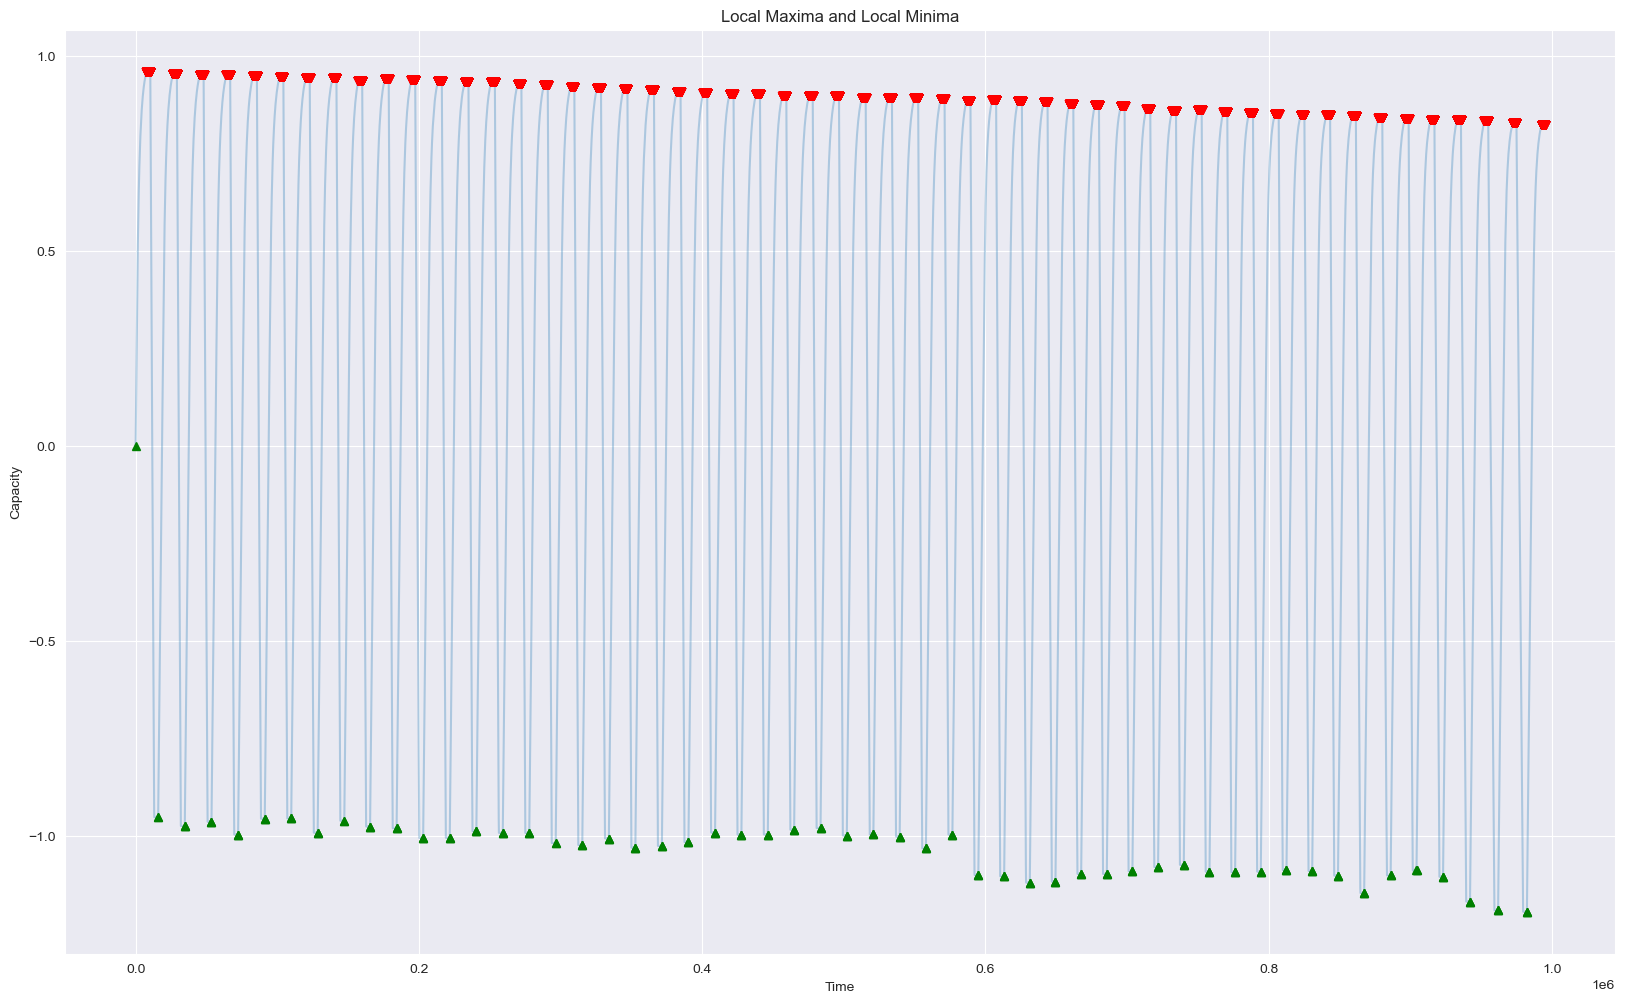

In [20]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [21]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [22]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
0.9593194444444445
[ 0.         -0.95302222 -0.97546389 -0.96463333 -0.99741667 -0.95675833
 -0.95597778 -0.99267778 -0.96201111 -0.97678611 -0.98126111 -1.00638611
 -1.00568333 -0.989225   -0.99324167 -0.99336111 -1.01925278 -1.024275
 -1.00729444 -1.03115278 -1.02656667 -1.01694444 -0.99236667 -0.99746111
 -0.99722778 -0.98508056 -0.98075833 -0.99984722 -0.99675556 -1.00235556
 -1.03265833 -

In [23]:
# df.insert(loc = 4,column ='Energy',value=df['Capacity']*df["Potential"]) # do add if needed 

In [24]:
# df.insert(loc = 5,column ='Power',value=df['Current']*df["Potential"])

In [24]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [25]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


Text(0.5, 1.0, 'Capacity vs TIme')

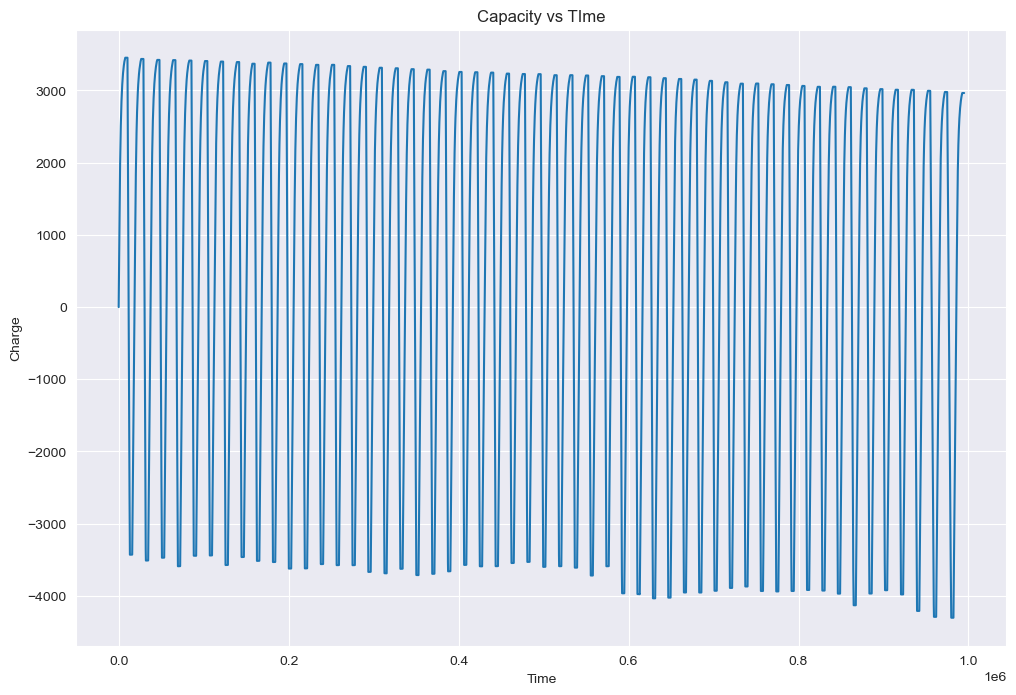

In [26]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Charge'])
plt.ylabel('Charge')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Integral current

In [27]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

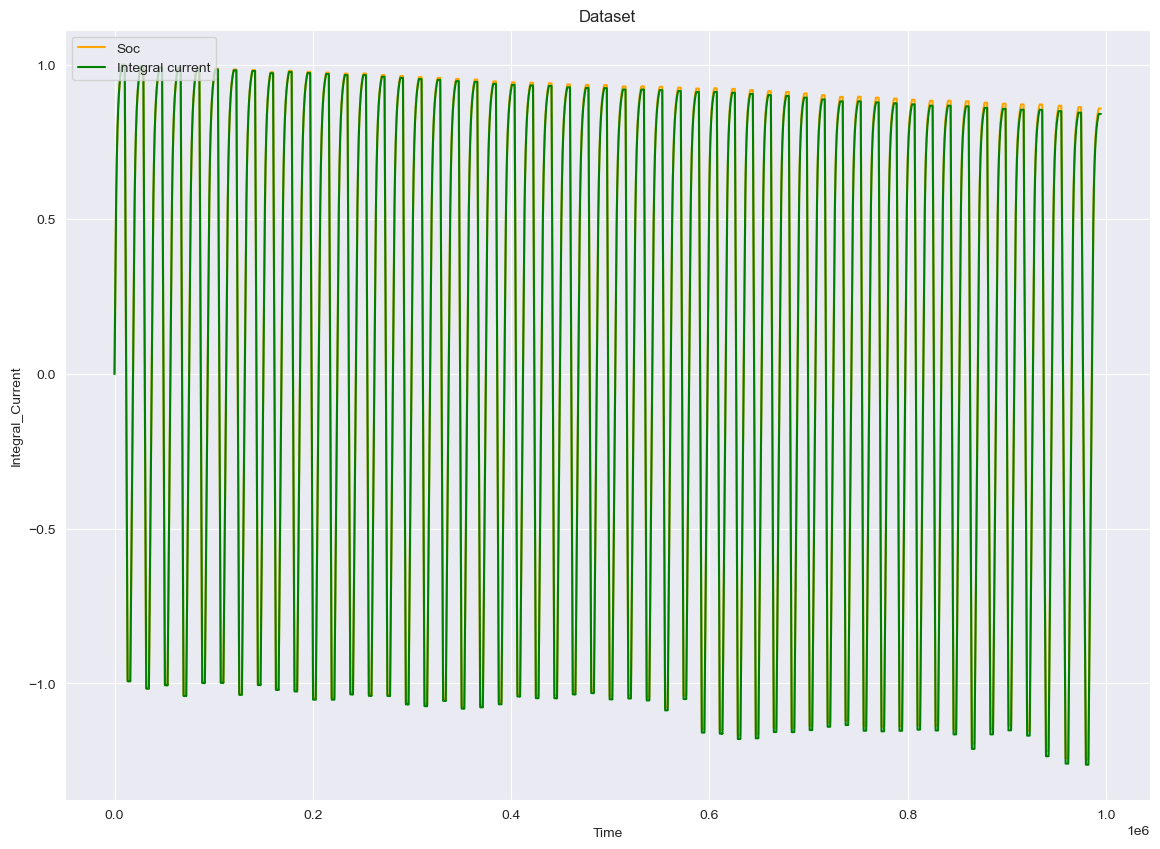

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [31]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Capacity            0
SOC                 0
Charge              0
Integral_current    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              994879 non-null  float64
 1   Potential         994879 non-null  float64
 2   Current           994879 non-null  float64
 3   Capacity          994879 non-null  float64
 4   SOC               994879 non-null  float64
 5   Charge            994879 non-null  float64
 6   Integral_current  994879 non-null  float64
dtypes: float64(7)
memory usage: 53.1 MB


In [33]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,3453.550000,0.999371


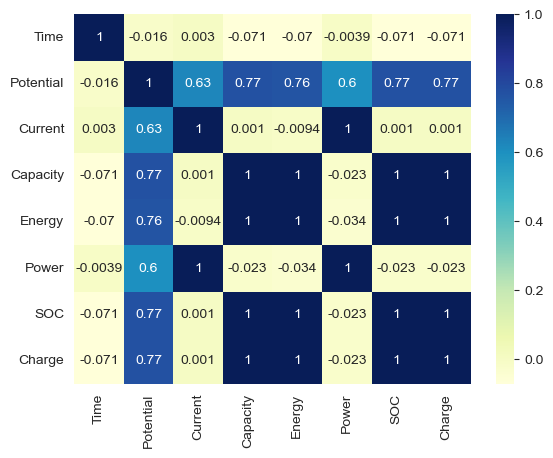

<Figure size 1400x1000 with 0 Axes>

In [28]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity','Charge','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [35]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.000000e+00,0.822158,0.969868,0.554717,0.000000,0.554717,0.558203
1,5.000005e-07,0.824159,0.969847,0.554823,0.000237,0.554823,0.558283
2,1.500001e-06,0.826242,0.969850,0.554996,0.000626,0.554996,0.558443
3,2.500002e-06,0.828049,0.969850,0.555148,0.000966,0.555148,0.558602
4,3.500003e-06,0.829519,0.969850,0.555320,0.001352,0.555320,0.558762


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              994879 non-null  float64
 1   Potential         994879 non-null  float64
 2   Current           994879 non-null  float64
 3   Capacity          994879 non-null  float64
 4   SOC               994879 non-null  float64
 5   Charge            994879 non-null  float64
 6   Integral_current  994879 non-null  float64
dtypes: float64(7)
memory usage: 53.1 MB


In [37]:
Y = df.pop('SOC')
X = df

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [39]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 6), (198976, 6), (795903,), (198976,))

In [40]:
X_train.head()

,Time,Potential,Current,Capacity,Charge,Integral_current
596728,0.601576,0.749376,0.969925,0.326953,0.326953,0.326965
844655,0.849747,0.408654,0.020253,0.537788,0.537788,0.534313
694331,0.699393,0.999600,0.668381,0.948694,0.948694,0.943123
846557,0.851649,0.462412,0.647200,0.043071,0.043071,0.043333
156838,0.158199,0.999607,0.665074,0.985802,0.985802,0.984443


In [36]:
Y_train.head()

465811   -0.703932
620692    0.862034
222619   -0.743521
180607   -0.419609
653049    0.143378
Name: SOC, dtype: float64

In [42]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [43]:
# # https://stackoverflow.com/questions/44475682/cross-validation-in-deep-neural-networks

# from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# kf =KFold(n_splits=5, shuffle=True, random_state=42)

# cnt = 1
# # split()  method generate indices to split data into training and test set.
# for train_index, test_index in kf.split(X, Y):
#     print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
#     cnt += 1

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [46]:
X_train.head()

,Time,Potential,Current,Capacity,Charge,Integral_current
596728,0.601576,0.749376,0.969925,0.326953,0.326953,0.326965
844655,0.849747,0.408654,0.020253,0.537788,0.537788,0.534313
694331,0.699393,0.999600,0.668381,0.948694,0.948694,0.943123
846557,0.851649,0.462412,0.647200,0.043071,0.043071,0.043333
156838,0.158199,0.999607,0.665074,0.985802,0.985802,0.984443


# Function for the AIC (Akaike information cirteria)

In [54]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

In [49]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(70,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'relu'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 12s 2ms/step - loss: 0.0084 - rmse: 0.0337 - mae: 0.0084 - mse: 0.0011 - mape: 7.0850 - val_loss: 0.0026 - val_rmse: 0.0034 - val_mae: 0.0026 - val_mse: 1.1524e-05 - val_mape: 1.0546
Epoch 2/100
6218/6218 [==============================] - 12s 2ms/step - loss: 0.0031 - rmse: 0.0041 - mae: 0.0031 - mse: 1.6970e-05 - mape: 12.5623 - val_loss: 0.0034 - val_rmse: 0.0041 - val_mae: 0.0034 - val_mse: 1.6446e-05 - val_mape: 1.6565
Epoch 3/100
6218/6218 [==============================] - 12s 2ms/step - loss: 0.0023 - rmse: 0.0031 - mae: 0.0023 - mse: 9.3588e-06 - mape: 15.1274 - val_loss: 0.0016 - val_rmse: 0.0020 - val_mae: 0.0016 - val_mse: 4.0466e-06 - val_mape: 1.1625
Epoch 4/100
6218/6218 [==============================] - 12s 2ms/step - loss: 0.0018 - rmse: 0.0024 - mae: 0.0018 - mse: 5.7991e-06 - mape: 7.0984 - val_loss: 8.6632e-04 - val_rmse: 0.0013 - val_mae: 8.6632e-04 - val_mse: 1.6411e-06 - val_mape: 0.2901
Epoch 5/100
6218/6

6218/6218 [==============================] - 11s 2ms/step - loss: 3.1907e-04 - rmse: 5.7940e-04 - mae: 3.1907e-04 - mse: 3.3570e-07 - mape: 1.0533 - val_loss: 2.2625e-04 - val_rmse: 5.1761e-04 - val_mae: 2.2625e-04 - val_mse: 2.6792e-07 - val_mape: 0.0930
Epoch 33/100
6218/6218 [==============================] - 12s 2ms/step - loss: 3.1285e-04 - rmse: 5.7362e-04 - mae: 3.1285e-04 - mse: 3.2904e-07 - mape: 1.3206 - val_loss: 2.4161e-04 - val_rmse: 5.3077e-04 - val_mae: 2.4161e-04 - val_mse: 2.8171e-07 - val_mape: 0.0869
Epoch 34/100
6218/6218 [==============================] - 12s 2ms/step - loss: 3.0764e-04 - rmse: 5.6861e-04 - mae: 3.0764e-04 - mse: 3.2332e-07 - mape: 0.6448 - val_loss: 2.8456e-04 - val_rmse: 5.3961e-04 - val_mae: 2.8456e-04 - val_mse: 2.9118e-07 - val_mape: 0.1259
Epoch 35/100
6218/6218 [==============================] - 12s 2ms/step - loss: 2.9577e-04 - rmse: 5.5655e-04 - mae: 2.9577e-04 - mse: 3.0975e-07 - mape: 0.2790 - val_loss: 4.8539e-04 - val_rmse: 6.7131e-04 

6218/6218 [==============================] - 11s 2ms/step - loss: 1.9278e-04 - rmse: 4.4899e-04 - mae: 1.9278e-04 - mse: 2.0159e-07 - mape: 0.3468 - val_loss: 1.5245e-04 - val_rmse: 4.3757e-04 - val_mae: 1.5245e-04 - val_mse: 1.9147e-07 - val_mape: 0.0507
Epoch 63/100
6218/6218 [==============================] - 11s 2ms/step - loss: 1.9376e-04 - rmse: 4.4827e-04 - mae: 1.9376e-04 - mse: 2.0094e-07 - mape: 0.4972 - val_loss: 1.6363e-04 - val_rmse: 4.3695e-04 - val_mae: 1.6363e-04 - val_mse: 1.9093e-07 - val_mape: 0.0548
Epoch 64/100
6218/6218 [==============================] - 11s 2ms/step - loss: 1.9206e-04 - rmse: 4.4729e-04 - mae: 1.9206e-04 - mse: 2.0007e-07 - mape: 0.3868 - val_loss: 1.5452e-04 - val_rmse: 4.3559e-04 - val_mae: 1.5452e-04 - val_mse: 1.8974e-07 - val_mape: 0.0638
Epoch 65/100
6218/6218 [==============================] - 11s 2ms/step - loss: 1.9441e-04 - rmse: 4.4767e-04 - mae: 1.9441e-04 - mse: 2.0041e-07 - mape: 0.5668 - val_loss: 2.4779e-04 - val_rmse: 4.7862e-04 

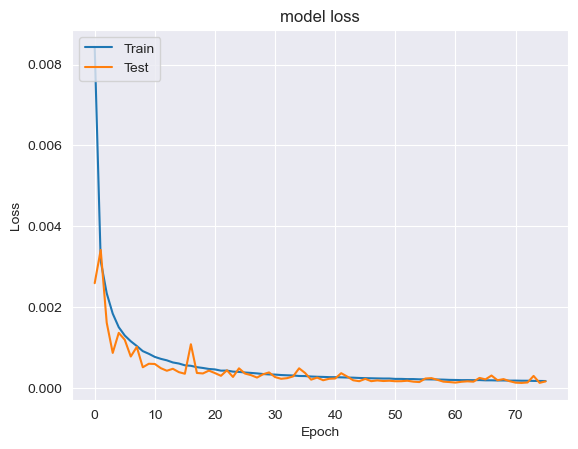

In [50]:
plot_his(history_1)

In [51]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 8s 1ms/step - loss: 1.6236e-04 - rmse: 4.2411e-04 - mae: 1.6236e-04 - mse: 1.7987e-07 - mape: 0.0592


[0.00016236287774518132,
 0.0004241132701281458,
 0.00016236287774518132,
 1.798720603574111e-07,
 0.059180375188589096]

In [52]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 6s 998us/step


In [53]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 70)                490       
                                                                 
 dense_5 (Dense)             (None, 50)                3550      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________________


In [84]:
# # AIC 1

# import tensorflow as tf
# from scipy.stats import norm

# # Train your model using TensorFlow
# model = model_1

# Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
# Y_pred_1 = np.asarray(Y_pred_1).astype('float32').reshape((-1,1))


# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

# # Calculate the number of parameters in the model
# num_params = model_1.count_params()

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic.numpy())

In [55]:
# # AIC 2
# # Get the model's maximum likelihood estimate of the parameters
# params = model_1.get_weights()[0]

# # Calculate the negative log-likelihood of the model's parameters based on the training data
# nll = -np.sum(Y_train * np.log(model_1.predict(X_train)) + (1 - Y_train) * np.log(1 - model_1.predict(X_train)))

# # Calculate the number of parameters in the model
# num_params = len(params)

# # Calculate the AIC value for the model
# aic = 2 * num_params - 2 * nll

# # Print the AIC value
# print("AIC: ", aic)





'''
Showing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64
'''

'\nShowing the error : MemoryError: Unable to allocate 4.61 TiB for an array with shape (795903, 795903) and data type float64\n'

# Function for the BIC (Baysian information criteria)

In [59]:
# # BIC
# log_likelihood = np.sum(np.log(Y_pred_1) * Y_test)

# # Calculate the BIC
# n = len(X_test)
# k = model_1.count_params()
# bic = -2 * log_likelihood + k * np.log(n)
# print(bic)

# Model 2

In [60]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 43s 2ms/step - loss: 0.0029 - rmse: 0.0175 - mae: 0.0029 - mse: 3.0684e-04 - mape: 13.2613 - val_loss: 0.0011 - val_rmse: 0.0013 - val_mae: 0.0011 - val_mse: 1.7688e-06 - val_mape: 0.4694
Epoch 2/100
24872/24872 [==============================] - 41s 2ms/step - loss: 4.1594e-04 - rmse: 5.5533e-04 - mae: 4.1594e-04 - mse: 3.0839e-07 - mape: 1.1921 - val_loss: 1.4193e-04 - val_rmse: 1.7220e-04 - val_mae: 1.4193e-04 - val_mse: 2.9651e-08 - val_mape: 0.0791
Epoch 3/100
24872/24872 [==============================] - 40s 2ms/step - loss: 2.3174e-04 - rmse: 3.0605e-04 - mae: 2.3174e-04 - mse: 9.3669e-08 - mape: 0.2856 - val_loss: 8.5968e-05 - val_rmse: 1.0386e-04 - val_mae: 8.5968e-05 - val_mse: 1.0787e-08 - val_mape: 0.0523
Epoch 4/100
24872/24872 [==============================] - 40s 2ms/step - loss: 1.6202e-04 - rmse: 2.1150e-04 - mae: 1.6202e-04 - mse: 4.4734e-08 - mape: 0.2575 - val_loss: 1.4143e-04 - val_rmse: 1.5850e-04 - val_

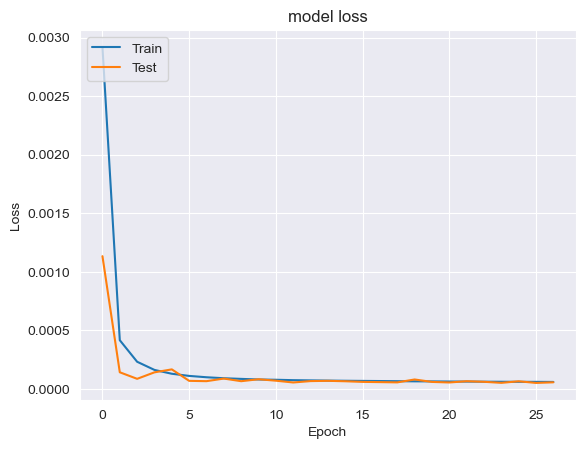

In [61]:
plot_his(history_2)

In [62]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 5.6258e-05 - rmse: 8.0892e-05 - mae: 5.6258e-05 - mse: 6.5434e-09 - mape: 0.0283


[5.625766425509937e-05,
 8.089158654911444e-05,
 5.625766425509937e-05,
 6.543448893836512e-09,
 0.028304573148489]

In [63]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 6s 949us/step


# Model 3

In [66]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 47s 2ms/step - loss: 0.0062 - rmse: 0.0323 - mae: 0.0062 - mse: 0.0010 - mape: 20.9569 - val_loss: 0.0015 - val_rmse: 0.0024 - val_mae: 0.0015 - val_mse: 5.9810e-06 - val_mape: 1.2676
Epoch 2/100
24872/24872 [==============================] - 42s 2ms/step - loss: 0.0016 - rmse: 0.0021 - mae: 0.0016 - mse: 4.3986e-06 - mape: 2.5008 - val_loss: 0.0014 - val_rmse: 0.0015 - val_mae: 0.0014 - val_mse: 2.2789e-06 - val_mape: 0.3077
Epoch 3/100
24872/24872 [==============================] - 40s 2ms/step - loss: 9.5719e-04 - rmse: 0.0012 - mae: 9.5719e-04 - mse: 1.5071e-06 - mape: 3.6120 - val_loss: 1.4482e-04 - val_rmse: 1.9578e-04 - val_mae: 1.4482e-04 - val_mse: 3.8330e-08 - val_mape: 0.1142
Epoch 4/100
24872/24872 [==============================] - 39s 2ms/step - loss: 7.0432e-04 - rmse: 9.0553e-04 - mae: 7.0432e-04 - mse: 8.1999e-07 - mape: 2.9464 - val_loss: 2.5489e-04 - val_rmse: 3.2624e-04 - val_mae: 2.5489e-04 - val_mse: 1.064

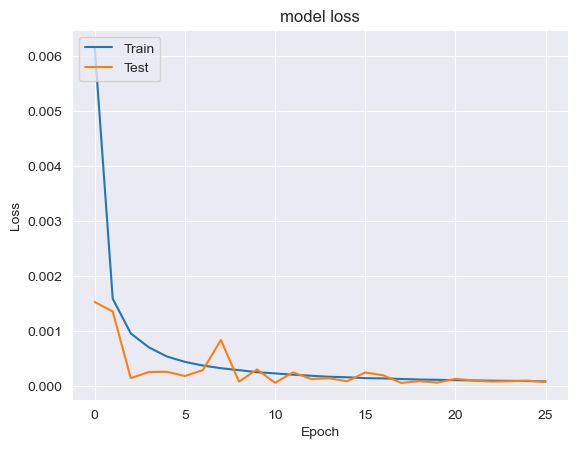

In [67]:
plot_his(history_3)

In [68]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 7.5652e-05 - rmse: 9.7331e-05 - mae: 7.5652e-05 - mse: 9.4733e-09 - mape: 0.0444


[7.565155829070136e-05,
 9.733095794217661e-05,
 7.565155829070136e-05,
 9.473315465413634e-09,
 0.04439503699541092]

In [69]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


# Model 4

In [72]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0036 - rmse: 0.0217 - mae: 0.0036 - mse: 4.6966e-04 - mape: 31.0999 - val_loss: 7.3049e-04 - val_rmse: 8.0836e-04 - val_mae: 7.3049e-04 - val_mse: 6.5345e-07 - val_mape: 0.3618
Epoch 2/100
24872/24872 [==============================] - 44s 2ms/step - loss: 5.0304e-04 - rmse: 6.7273e-04 - mae: 5.0304e-04 - mse: 4.5257e-07 - mape: 1.7456 - val_loss: 1.2800e-04 - val_rmse: 1.6463e-04 - val_mae: 1.2800e-04 - val_mse: 2.7104e-08 - val_mape: 0.0693
Epoch 3/100
24872/24872 [==============================] - 43s 2ms/step - loss: 2.7046e-04 - rmse: 3.5406e-04 - mae: 2.7046e-04 - mse: 1.2536e-07 - mape: 0.7931 - val_loss: 2.1040e-04 - val_rmse: 2.5045e-04 - val_mae: 2.1040e-04 - val_mse: 6.2724e-08 - val_mape: 0.0886
Epoch 4/100
24872/24872 [==============================] - 43s 2ms/step - loss: 1.9176e-04 - rmse: 2.4956e-04 - mae: 1.9176e-04 - mse: 6.2278e-08 - mape: 0.3589 - val_loss: 1.3941e-04 - val_rmse: 1.642

24872/24872 [==============================] - 69s 3ms/step - loss: 6.6095e-05 - rmse: 8.9063e-05 - mae: 6.6095e-05 - mse: 7.9322e-09 - mape: 0.3110 - val_loss: 5.9016e-05 - val_rmse: 8.2353e-05 - val_mae: 5.9016e-05 - val_mse: 6.7820e-09 - val_mape: 0.0326
Epoch 32/100
24872/24872 [==============================] - 63s 3ms/step - loss: 6.5520e-05 - rmse: 8.8486e-05 - mae: 6.5520e-05 - mse: 7.8298e-09 - mape: 0.3586 - val_loss: 6.1573e-05 - val_rmse: 8.7137e-05 - val_mae: 6.1573e-05 - val_mse: 7.5928e-09 - val_mape: 0.0335
Epoch 33/100
24872/24872 [==============================] - 67s 3ms/step - loss: 6.5092e-05 - rmse: 8.7841e-05 - mae: 6.5092e-05 - mse: 7.7160e-09 - mape: 0.3705 - val_loss: 8.0610e-05 - val_rmse: 9.3703e-05 - val_mae: 8.0610e-05 - val_mse: 8.7803e-09 - val_mape: 0.0455
Epoch 33: early stopping
CPU times: total: 49min 39s
Wall time: 29min 56s


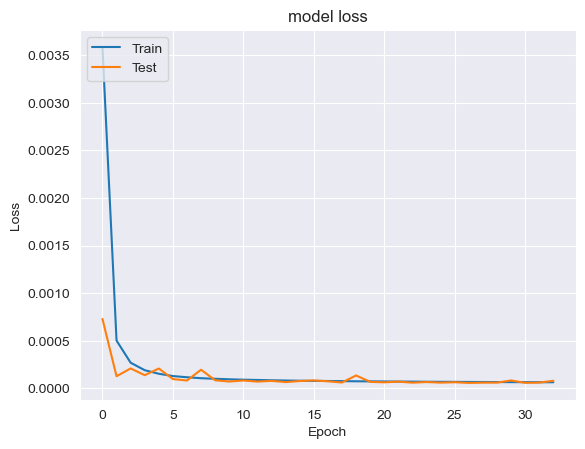

In [73]:
plot_his(history_4)

In [74]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 8.0610e-05 - rmse: 9.3703e-05 - mae: 8.0610e-05 - mse: 8.7803e-09 - mape: 0.0455


[8.061002881731838e-05,
 9.370334737468511e-05,
 8.061002881731838e-05,
 8.78031780615629e-09,
 0.045517079532146454]

In [75]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


# LSTM


# Model 5

In [76]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 186s 7ms/step - loss: 0.0114 - rmse: 0.0593 - mae: 0.0114 - mse: 0.0035 - mape: 44.0736 - val_loss: 0.0055 - val_rmse: 0.0058 - val_mae: 0.0055 - val_mse: 3.3817e-05 - val_mape: 2.8632
Epoch 2/50
24872/24872 [==============================] - 194s 8ms/step - loss: 0.0022 - rmse: 0.0029 - mae: 0.0022 - mse: 8.4973e-06 - mape: 5.0115 - val_loss: 8.9461e-04 - val_rmse: 0.0013 - val_mae: 8.9461e-04 - val_mse: 1.6088e-06 - val_mape: 0.3950
Epoch 3/50
24872/24872 [==============================] - 185s 7ms/step - loss: 0.0014 - rmse: 0.0019 - mae: 0.0014 - mse: 3.4577e-06 - mape: 4.1792 - val_loss: 0.0023 - val_rmse: 0.0025 - val_mae: 0.0023 - val_mse: 6.1346e-06 - val_mape: 1.1599
Epoch 4/50
24872/24872 [==============================] - 170s 7ms/step - loss: 0.0011 - rmse: 0.0014 - mae: 0.0011 - mse: 1.9318e-06 - mape: 3.9516 - val_loss: 6.9890e-04 - val_rmse: 9.2314e-04 - val_mae: 6.9890e-04 - val_mse: 8.5219e-07 - val_mape: 0.2765

24872/24872 [==============================] - 140s 6ms/step - loss: 2.7238e-04 - rmse: 4.1233e-04 - mae: 2.7238e-04 - mse: 1.7002e-07 - mape: 0.7588 - val_loss: 3.3392e-04 - val_rmse: 4.6458e-04 - val_mae: 3.3392e-04 - val_mse: 2.1584e-07 - val_mape: 0.2043
Epoch 32/50
24872/24872 [==============================] - 139s 6ms/step - loss: 2.6850e-04 - rmse: 4.0766e-04 - mae: 2.6850e-04 - mse: 1.6618e-07 - mape: 1.2060 - val_loss: 2.9631e-04 - val_rmse: 4.2133e-04 - val_mae: 2.9631e-04 - val_mse: 1.7752e-07 - val_mape: 0.1408
Epoch 33/50
24872/24872 [==============================] - 140s 6ms/step - loss: 2.6526e-04 - rmse: 4.0326e-04 - mae: 2.6526e-04 - mse: 1.6262e-07 - mape: 0.6134 - val_loss: 2.2047e-04 - val_rmse: 3.6995e-04 - val_mae: 2.2047e-04 - val_mse: 1.3686e-07 - val_mape: 0.1269
Epoch 34/50
24872/24872 [==============================] - 137s 6ms/step - loss: 2.6311e-04 - rmse: 4.0017e-04 - mae: 2.6311e-04 - mse: 1.6013e-07 - mape: 0.8585 - val_loss: 2.3056e-04 - val_rmse: 3.

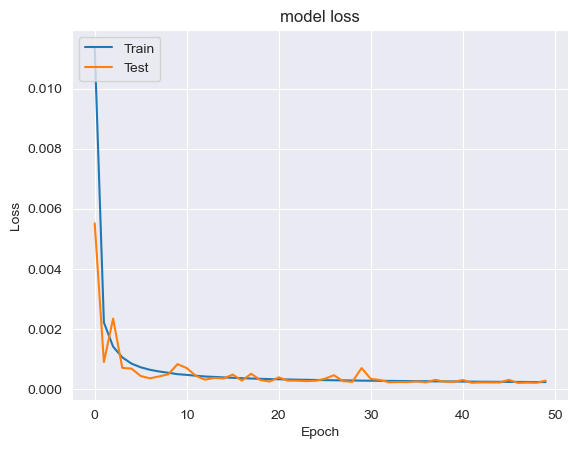

In [77]:
plot_his(history_5)

In [78]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 16s 3ms/step - loss: 2.7534e-04 - rmse: 3.8230e-04 - mae: 2.7534e-04 - mse: 1.4616e-07 - mape: 0.1290


[0.00027533865068107843,
 0.000382302823709324,
 0.00027533865068107843,
 1.461554433035417e-07,
 0.12895604968070984]

In [79]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [80]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 14s 2ms/step


In [82]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25701.582


In [114]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


# Model 6

In [83]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 177s 7ms/step - loss: 0.0107 - rmse: 0.0479 - mae: 0.0107 - mse: 0.0023 - mape: 59.9627 - val_loss: 0.0073 - val_rmse: 0.0079 - val_mae: 0.0073 - val_mse: 6.1758e-05 - val_mape: 3.8399
Epoch 2/40
24872/24872 [==============================] - 250s 10ms/step - loss: 0.0025 - rmse: 0.0032 - mae: 0.0025 - mse: 1.0286e-05 - mape: 4.6443 - val_loss: 0.0032 - val_rmse: 0.0034 - val_mae: 0.0032 - val_mse: 1.1886e-05 - val_mape: 1.4900
Epoch 3/40
24872/24872 [==============================] - 241s 10ms/step - loss: 0.0015 - rmse: 0.0020 - mae: 0.0015 - mse: 3.8792e-06 - mape: 6.6000 - val_loss: 5.3176e-04 - val_rmse: 7.7123e-04 - val_mae: 5.3176e-04 - val_mse: 5.9479e-07 - val_mape: 0.2709
Epoch 4/40
24872/24872 [==============================] - 214s 9ms/step - loss: 0.0011 - rmse: 0.0014 - mae: 0.0011 - mse: 1.9455e-06 - mape: 1.0375 - val_loss: 0.0012 - val_rmse: 0.0015 - val_mae: 0.0012 - val_mse: 2.1384e-06 - val_mape: 0.5841
Epoch

Epoch 32/40
24872/24872 [==============================] - 152s 6ms/step - loss: 2.0659e-04 - rmse: 3.0685e-04 - mae: 2.0659e-04 - mse: 9.4158e-08 - mape: 2.5569 - val_loss: 1.6321e-04 - val_rmse: 2.6853e-04 - val_mae: 1.6321e-04 - val_mse: 7.2107e-08 - val_mape: 0.0958
Epoch 33/40
24872/24872 [==============================] - 150s 6ms/step - loss: 2.0337e-04 - rmse: 3.0310e-04 - mae: 2.0337e-04 - mse: 9.1870e-08 - mape: 1.8820 - val_loss: 1.6641e-04 - val_rmse: 2.7570e-04 - val_mae: 1.6641e-04 - val_mse: 7.6009e-08 - val_mape: 0.0986
Epoch 34/40
24872/24872 [==============================] - 145s 6ms/step - loss: 2.0046e-04 - rmse: 3.0003e-04 - mae: 2.0046e-04 - mse: 9.0018e-08 - mape: 2.0878 - val_loss: 4.1627e-04 - val_rmse: 4.7558e-04 - val_mae: 4.1627e-04 - val_mse: 2.2617e-07 - val_mape: 0.2199
Epoch 35/40
24872/24872 [==============================] - 164s 7ms/step - loss: 2.0022e-04 - rmse: 2.9927e-04 - mae: 2.0022e-04 - mse: 8.9562e-08 - mape: 1.8633 - val_loss: 1.5597e-04 - 

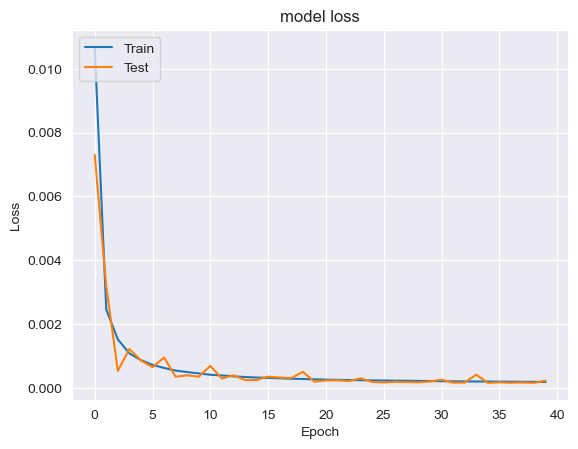

In [84]:
plot_his(history_6)

In [85]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_24 (Dense)            (None, 20)                620       
                                                                 
 dense_25 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [86]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 17s 3ms/step - loss: 2.2653e-04 - rmse: 3.1044e-04 - mae: 2.2653e-04 - mse: 9.6372e-08 - mape: 0.1187


[0.00022653215273749083,
 0.00031043769558891654,
 0.00022653215273749083,
 9.637156495045929e-08,
 0.11873134225606918]

In [87]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 15s 2ms/step


In [88]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65841.58


In [113]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_24 (Dense)            (None, 20)                620       
                                                                 
 dense_25 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


# Model 7

In [96]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu',return_sequences=True),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 58s 8ms/step - loss: 0.3054 - rmse: 0.5113 - mae: 0.3054 - mse: 0.2614 - mape: 865.8928 - val_loss: 0.2118 - val_rmse: 0.4070 - val_mae: 0.2118 - val_mse: 0.1656 - val_mape: 115.2476
Epoch 2/70
6218/6218 [==============================] - 51s 8ms/step - loss: 0.1856 - rmse: 0.4019 - mae: 0.1856 - mse: 0.1615 - mape: 556.1742 - val_loss: 0.1754 - val_rmse: 0.3988 - val_mae: 0.1754 - val_mse: 0.1590 - val_mape: 100.1982
Epoch 3/70
6218/6218 [==============================] - 62s 10ms/step - loss: 0.1730 - rmse: 0.3996 - mae: 0.1730 - mse: 0.1597 - mape: 532.1833 - val_loss: 0.1692 - val_rmse: 0.4000 - val_mae: 0.1692 - val_mse: 0.1600 - val_mape: 98.0673
Epoch 4/70
6218/6218 [==============================] - 57s 9ms/step - loss: 0.1693 - rmse: 0.3989 - mae: 0.1693 - mse: 0.1591 - mape: 523.0529 - val_loss: 0.1666 - val_rmse: 0.3982 - val_mae: 0.1666 - val_mse: 0.1585 - val_mape: 95.0457
Epoch 5/70
6218/6218 [=======================

6218/6218 [==============================] - 44s 7ms/step - loss: 0.1532 - rmse: 0.3871 - mae: 0.1532 - mse: 0.1498 - mape: 480.3755 - val_loss: 0.1533 - val_rmse: 0.3869 - val_mae: 0.1533 - val_mse: 0.1497 - val_mape: 81.5569
Epoch 36/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.1531 - rmse: 0.3868 - mae: 0.1531 - mse: 0.1496 - mape: 481.9095 - val_loss: 0.1530 - val_rmse: 0.3873 - val_mae: 0.1530 - val_mse: 0.1500 - val_mape: 81.4623
Epoch 37/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.1530 - rmse: 0.3868 - mae: 0.1530 - mse: 0.1496 - mape: 484.7907 - val_loss: 0.1531 - val_rmse: 0.3873 - val_mae: 0.1531 - val_mse: 0.1500 - val_mape: 81.5331
Epoch 38/70
6218/6218 [==============================] - 44s 7ms/step - loss: 0.1529 - rmse: 0.3868 - mae: 0.1529 - mse: 0.1496 - mape: 477.9144 - val_loss: 0.1529 - val_rmse: 0.3870 - val_mae: 0.1529 - val_mse: 0.1498 - val_mape: 81.2664
Epoch 39/70
6218/6218 [==============================] -

6218/6218 [==============================] - 44s 7ms/step - loss: 0.1510 - rmse: 0.3846 - mae: 0.1510 - mse: 0.1479 - mape: 470.6366 - val_loss: 0.1510 - val_rmse: 0.3846 - val_mae: 0.1510 - val_mse: 0.1479 - val_mape: 77.5263
Epoch 70/70
6218/6218 [==============================] - 45s 7ms/step - loss: 0.1509 - rmse: 0.3844 - mae: 0.1509 - mse: 0.1477 - mape: 468.0987 - val_loss: 0.1509 - val_rmse: 0.3854 - val_mae: 0.1509 - val_mse: 0.1485 - val_mape: 77.7337


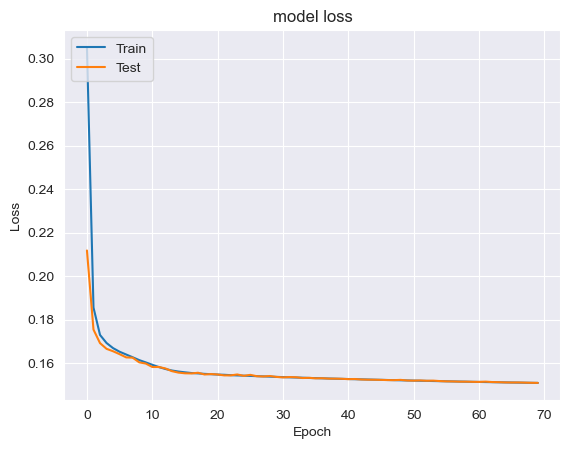

In [97]:
plot_his(history_7)

In [98]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 13s 2ms/step


In [99]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 16s 3ms/step - loss: 0.1509 - rmse: 0.3854 - mae: 0.1509 - mse: 0.1485 - mape: 77.7336


[0.1509314626455307,
 0.38541150093078613,
 0.1509314626455307,
 0.14854225516319275,
 77.73357391357422]

In [102]:
# AIC_value(model_7,prediction_7,Y_test)

In [112]:
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 6, 30)             3840      
                                                                 
 lstm_9 (LSTM)               (None, 6, 10)             1640      
                                                                 
 dense_30 (Dense)            (None, 6, 10)             110       
                                                                 
 dense_31 (Dense)            (None, 6, 1)              11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [121]:
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
prediction_7 = np.asarray(prediction_7).astype('float32').reshape((-1,1))


# Calculate the negative log-likelihood of the model's parameters based on the training data
nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=prediction_7[:198976]))

# Calculate the number of parameters in the model
num_params = model_7.count_params()

# Calculate the AIC value for the model
aic = 2 * num_params - 2 * nll

# Print the AIC value
print("AIC: ", aic.numpy())

AIC:  11200.341


In [122]:
AIC_value(model_7,prediction_7[:198976],Y_test)  # becaus logitis are geetting shape error

AIC:  11200.341


# Model 8

In [123]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 102s 8ms/step - loss: 0.0128 - rmse: 0.0668 - mae: 0.0128 - mse: 0.0045 - mape: 20.8017 - val_loss: 0.0029 - val_rmse: 0.0039 - val_mae: 0.0029 - val_mse: 1.5038e-05 - val_mape: 1.0825
Epoch 2/40
12436/12436 [==============================] - 93s 7ms/step - loss: 0.0018 - rmse: 0.0027 - mae: 0.0018 - mse: 7.3778e-06 - mape: 6.4008 - val_loss: 0.0013 - val_rmse: 0.0020 - val_mae: 0.0013 - val_mse: 4.0899e-06 - val_mape: 0.6326
Epoch 3/40
12436/12436 [==============================] - 96s 8ms/step - loss: 0.0013 - rmse: 0.0020 - mae: 0.0013 - mse: 4.0143e-06 - mape: 1.1096 - val_loss: 0.0013 - val_rmse: 0.0019 - val_mae: 0.0013 - val_mse: 3.4710e-06 - val_mape: 0.6018
Epoch 4/40
12436/12436 [==============================] - 115s 9ms/step - loss: 0.0011 - rmse: 0.0017 - mae: 0.0011 - mse: 3.0018e-06 - mape: 1.7121 - val_loss: 0.0011 - val_rmse: 0.0017 - val_mae: 0.0011 - val_mse: 2.9033e-06 - val_mape: 0.6166
Epoch 5/40
12436/1243

12436/12436 [==============================] - 124s 10ms/step - loss: 4.8927e-04 - rmse: 9.0240e-04 - mae: 4.8927e-04 - mse: 8.1432e-07 - mape: 2.3756 - val_loss: 4.7090e-04 - val_rmse: 8.8481e-04 - val_mae: 4.7090e-04 - val_mse: 7.8289e-07 - val_mape: 0.3761
Epoch 33/40
12436/12436 [==============================] - 129s 10ms/step - loss: 4.8478e-04 - rmse: 8.9333e-04 - mae: 4.8478e-04 - mse: 7.9804e-07 - mape: 2.9153 - val_loss: 5.2305e-04 - val_rmse: 9.0369e-04 - val_mae: 5.2305e-04 - val_mse: 8.1666e-07 - val_mape: 0.4062
Epoch 34/40
12436/12436 [==============================] - 142s 11ms/step - loss: 4.7990e-04 - rmse: 8.8383e-04 - mae: 4.7990e-04 - mse: 7.8115e-07 - mape: 2.6365 - val_loss: 4.7678e-04 - val_rmse: 8.7254e-04 - val_mae: 4.7678e-04 - val_mse: 7.6132e-07 - val_mape: 0.3648
Epoch 35/40
12436/12436 [==============================] - 153s 12ms/step - loss: 4.7592e-04 - rmse: 8.7526e-04 - mae: 4.7592e-04 - mse: 7.6607e-07 - mape: 2.6342 - val_loss: 4.5547e-04 - val_rmse

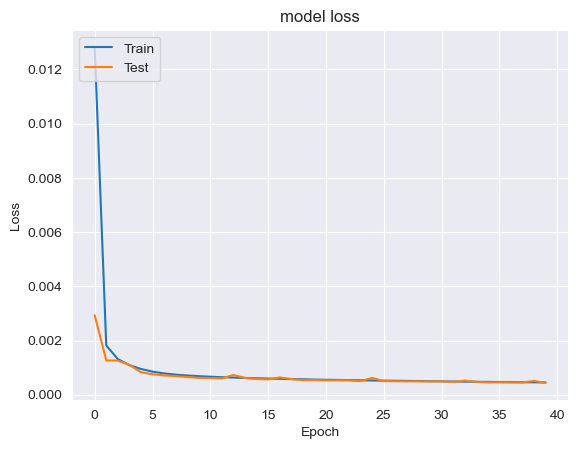

In [124]:
plot_his(history_8)

In [125]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [126]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 22s 3ms/step - loss: 4.3734e-04 - rmse: 8.1421e-04 - mae: 4.3734e-04 - mse: 6.6293e-07 - mape: 0.3537


[0.0004373442498035729,
 0.0008142065489664674,
 0.0004373442498035729,
 6.629322797380155e-07,
 0.3537163734436035]

In [127]:
AIC_value(model_8,prediction_8, Y_test)

AIC:  65841.586


# CNN

# Model 9

In [128]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0055 - rmse: 0.0350 - mae: 0.0055 - mse: 0.0012 - mape: 10.0808 - val_loss: 0.0019 - val_rmse: 0.0032 - val_mae: 0.0019 - val_mse: 1.0509e-05 - val_mape: 0.5407
Epoch 2/50
24872/24872 [==============================] - 96s 4ms/step - loss: 0.0018 - rmse: 0.0030 - mae: 0.0018 - mse: 9.0995e-06 - mape: 4.1461 - val_loss: 0.0014 - val_rmse: 0.0027 - val_mae: 0.0014 - val_mse: 7.3893e-06 - val_mape: 0.5011
Epoch 3/50
24872/24872 [==============================] - 104s 4ms/step - loss: 0.0015 - rmse: 0.0027 - mae: 0.0015 - mse: 7.4998e-06 - mape: 1.3616 - val_loss: 0.0014 - val_rmse: 0.0026 - val_mae: 0.0014 - val_mse: 6.5768e-06 - val_mape: 0.4400
Epoch 4/50
24872/24872 [==============================] - 100s 4ms/step - loss: 0.0014 - rmse: 0.0025 - mae: 0.0014 - mse: 6.3551e-06 - mape: 1.3728 - val_loss: 0.0012 - val_rmse: 0.0024 - val_mae: 0.0012 - val_mse: 5.6568e-06 - val_mape: 0.3298
Epoch 5/50
24872/2487

Epoch 33/50
24872/24872 [==============================] - 93s 4ms/step - loss: 7.1687e-04 - rmse: 0.0016 - mae: 7.1687e-04 - mse: 2.4932e-06 - mape: 0.8316 - val_loss: 7.1402e-04 - val_rmse: 0.0016 - val_mae: 7.1402e-04 - val_mse: 2.6109e-06 - val_mape: 0.2012
Epoch 34/50
24872/24872 [==============================] - 92s 4ms/step - loss: 7.0943e-04 - rmse: 0.0016 - mae: 7.0943e-04 - mse: 2.4530e-06 - mape: 0.7492 - val_loss: 6.8517e-04 - val_rmse: 0.0015 - val_mae: 6.8517e-04 - val_mse: 2.4020e-06 - val_mape: 0.1981
Epoch 35/50
24872/24872 [==============================] - 90s 4ms/step - loss: 7.0179e-04 - rmse: 0.0016 - mae: 7.0179e-04 - mse: 2.4138e-06 - mape: 0.6624 - val_loss: 6.8217e-04 - val_rmse: 0.0016 - val_mae: 6.8217e-04 - val_mse: 2.4171e-06 - val_mape: 0.2064
Epoch 36/50
24872/24872 [==============================] - 86s 3ms/step - loss: 6.9474e-04 - rmse: 0.0015 - mae: 6.9474e-04 - mse: 2.3743e-06 - mape: 0.5149 - val_loss: 6.9597e-04 - val_rmse: 0.0016 - val_mae: 6.95

In [129]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 15s 2ms/step - loss: 6.1711e-04 - rmse: 0.0014 - mae: 6.1711e-04 - mse: 1.9618e-06 - mape: 0.1995


[0.0006171140121296048,
 0.001400645007379353,
 0.0006171140121296048,
 1.9618064470705576e-06,
 0.1994638741016388]

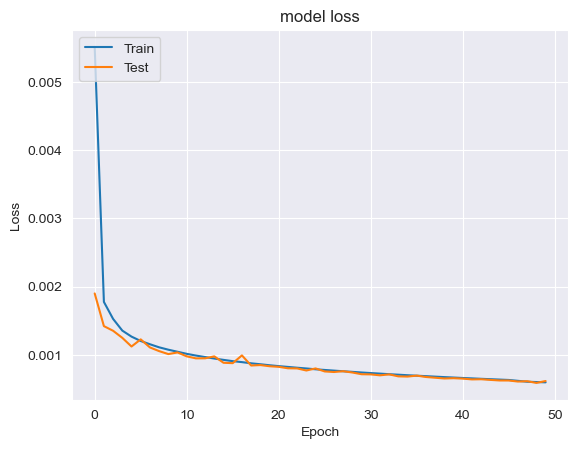

In [130]:
plot_his(history_9)

In [131]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 12s 2ms/step


In [132]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  741.5822


# Model 10

In [133]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 97s 4ms/step - loss: 0.0049 - rmse: 0.0246 - mae: 0.0049 - mse: 6.0585e-04 - mape: 23.4667 - val_loss: 0.0022 - val_rmse: 0.0026 - val_mae: 0.0022 - val_mse: 6.6287e-06 - val_mape: 1.1583
Epoch 2/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.0014 - rmse: 0.0018 - mae: 0.0014 - mse: 3.4150e-06 - mape: 3.8569 - val_loss: 3.6434e-04 - val_rmse: 4.5977e-04 - val_mae: 3.6434e-04 - val_mse: 2.1139e-07 - val_mape: 0.2465
Epoch 3/100
24872/24872 [==============================] - 50s 2ms/step - loss: 8.8301e-04 - rmse: 0.0012 - mae: 8.8301e-04 - mse: 1.3556e-06 - mape: 2.3617 - val_loss: 3.6555e-04 - val_rmse: 4.0621e-04 - val_mae: 3.6555e-04 - val_mse: 1.6501e-07 - val_mape: 0.1006
Epoch 4/100
24872/24872 [==============================] - 47s 2ms/step - loss: 6.3027e-04 - rmse: 8.3053e-04 - mae: 6.3027e-04 - mse: 6.8978e-07 - mape: 2.3621 - val_loss: 3.6987e-04 - val_rmse: 4.7862e-04 - val_mae: 3.6987e-04 

24872/24872 [==============================] - 43s 2ms/step - loss: 7.0715e-05 - rmse: 9.3580e-05 - mae: 7.0715e-05 - mse: 8.7572e-09 - mape: 0.1999 - val_loss: 8.3256e-05 - val_rmse: 8.8916e-05 - val_mae: 8.3256e-05 - val_mse: 7.9060e-09 - val_mape: 0.0408
Epoch 32/100
24872/24872 [==============================] - 43s 2ms/step - loss: 6.7280e-05 - rmse: 8.7831e-05 - mae: 6.7280e-05 - mse: 7.7143e-09 - mape: 0.3382 - val_loss: 6.6688e-05 - val_rmse: 7.9902e-05 - val_mae: 6.6688e-05 - val_mse: 6.3843e-09 - val_mape: 0.0364
Epoch 33/100
24872/24872 [==============================] - 43s 2ms/step - loss: 6.4396e-05 - rmse: 8.4755e-05 - mae: 6.4396e-05 - mse: 7.1835e-09 - mape: 0.1641 - val_loss: 3.9154e-05 - val_rmse: 4.6267e-05 - val_mae: 3.9154e-05 - val_mse: 2.1407e-09 - val_mape: 0.0280
Epoch 33: early stopping
CPU times: total: 46min 4s
Wall time: 26min 42s


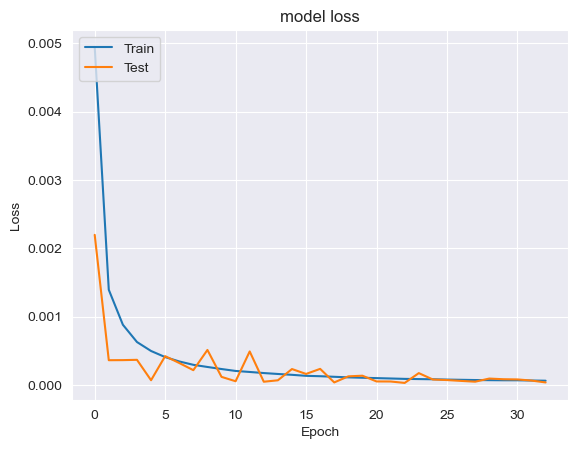

In [134]:
plot_his(history_10)

In [135]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 3.9154e-05 - rmse: 4.6267e-05 - mae: 3.9154e-05 - mse: 2.1407e-09 - mape: 0.0280


[3.9154252590378746e-05,
 4.626745794666931e-05,
 3.9154252590378746e-05,
 2.1406776351540202e-09,
 0.02802060917019844]

In [136]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 6s 958us/step


# Model 11

In [137]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 47s 2ms/step - loss: 0.0070 - rmse: 0.0506 - mae: 0.0070 - mse: 0.0026 - mape: 12.9345 - val_loss: 0.0015 - val_rmse: 0.0026 - val_mae: 0.0015 - val_mse: 6.7781e-06 - val_mape: 0.8211
Epoch 2/100
24872/24872 [==============================] - 50s 2ms/step - loss: 0.0010 - rmse: 0.0020 - mae: 0.0010 - mse: 3.8492e-06 - mape: 3.5655 - val_loss: 1.8047e-04 - val_rmse: 0.0011 - val_mae: 1.8047e-04 - val_mse: 1.1116e-06 - val_mape: 0.0406
Epoch 3/100
24872/24872 [==============================] - 47s 2ms/step - loss: 1.2599e-04 - rmse: 7.3823e-04 - mae: 1.2599e-04 - mse: 5.4498e-07 - mape: 0.4046 - val_loss: 9.2824e-05 - val_rmse: 6.1553e-04 - val_mae: 9.2824e-05 - val_mse: 3.7887e-07 - val_mape: 0.0296
Epoch 4/100
24872/24872 [==============================] - 84s 3ms/step - loss: 9.8123e-05 - rmse: 5.3262e-04 - mae: 9.8123e-05 - mse: 2.8368e-07 - mape: 0.1685 - val_loss: 8.5510e-05 - val_rmse: 5.1492e-04 - val_mae: 8.5510e-05 - va

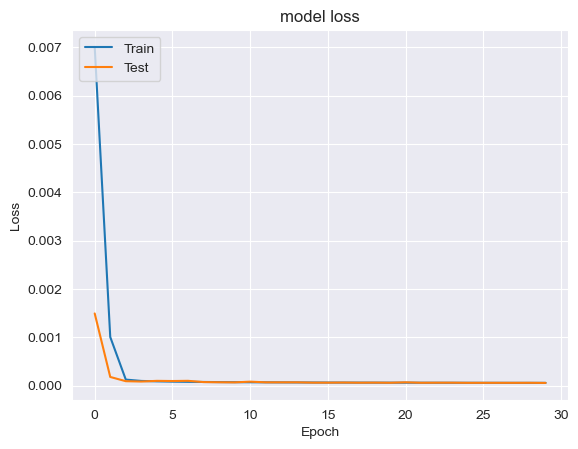

In [138]:
plot_his(history_11)

In [139]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 5.7091e-05 - rmse: 2.3365e-04 - mae: 5.7091e-05 - mse: 5.4590e-08 - mape: 0.0256


[5.709058677894063e-05,
 0.00023364585649687797,
 5.709058677894063e-05,
 5.4590387321695744e-08,
 0.02562866546213627]

In [140]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 7s 1ms/step


# Model 12

In [141]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0041 - rmse: 0.0230 - mae: 0.0041 - mse: 5.3129e-04 - mape: 10.0323 - val_loss: 3.7988e-04 - val_rmse: 4.1659e-04 - val_mae: 3.7988e-04 - val_mse: 1.7355e-07 - val_mape: 0.1856
Epoch 2/100
24872/24872 [==============================] - 44s 2ms/step - loss: 0.0012 - rmse: 0.0016 - mae: 0.0012 - mse: 2.5048e-06 - mape: 1.4102 - val_loss: 9.2725e-04 - val_rmse: 0.0011 - val_mae: 9.2725e-04 - val_mse: 1.1700e-06 - val_mape: 0.3877
Epoch 3/100
24872/24872 [==============================] - 45s 2ms/step - loss: 7.5455e-04 - rmse: 9.7946e-04 - mae: 7.5455e-04 - mse: 9.5935e-07 - mape: 1.0055 - val_loss: 2.8655e-04 - val_rmse: 3.1978e-04 - val_mae: 2.8655e-04 - val_mse: 1.0226e-07 - val_mape: 0.0959
Epoch 4/100
24872/24872 [==============================] - 47s 2ms/step - loss: 5.4465e-04 - rmse: 7.0228e-04 - mae: 5.4465e-04 - mse: 4.9319e-07 - mape: 1.0409 - val_loss: 3.7030e-04 - val_rmse: 3.8040e-04 - val_mae:

24872/24872 [==============================] - 47s 2ms/step - loss: 5.8658e-05 - rmse: 7.6068e-05 - mae: 5.8658e-05 - mse: 5.7863e-09 - mape: 0.1552 - val_loss: 3.6316e-05 - val_rmse: 4.3593e-05 - val_mae: 3.6316e-05 - val_mse: 1.9003e-09 - val_mape: 0.0150
Epoch 32/100
24872/24872 [==============================] - 47s 2ms/step - loss: 5.6577e-05 - rmse: 7.3126e-05 - mae: 5.6577e-05 - mse: 5.3474e-09 - mape: 0.2758 - val_loss: 4.9431e-05 - val_rmse: 5.4973e-05 - val_mae: 4.9431e-05 - val_mse: 3.0221e-09 - val_mape: 0.0272
Epoch 33/100
24872/24872 [==============================] - 46s 2ms/step - loss: 5.4327e-05 - rmse: 7.0345e-05 - mae: 5.4327e-05 - mse: 4.9484e-09 - mape: 0.1021 - val_loss: 2.1292e-05 - val_rmse: 2.7803e-05 - val_mae: 2.1292e-05 - val_mse: 7.7303e-10 - val_mape: 0.0110
Epoch 34/100
24872/24872 [==============================] - 46s 2ms/step - loss: 5.1576e-05 - rmse: 6.6835e-05 - mae: 5.1576e-05 - mse: 4.4669e-09 - mape: 0.1306 - val_loss: 7.6640e-05 - val_rmse: 8.9

24872/24872 [==============================] - 48s 2ms/step - loss: 2.8765e-05 - rmse: 3.7022e-05 - mae: 2.8765e-05 - mse: 1.3707e-09 - mape: 0.1197 - val_loss: 1.7233e-05 - val_rmse: 2.0670e-05 - val_mae: 1.7233e-05 - val_mse: 4.2723e-10 - val_mape: 0.0093
Epoch 62/100
24872/24872 [==============================] - 48s 2ms/step - loss: 2.9203e-05 - rmse: 3.7744e-05 - mae: 2.9203e-05 - mse: 1.4246e-09 - mape: 0.0647 - val_loss: 3.6951e-05 - val_rmse: 4.1111e-05 - val_mae: 3.6951e-05 - val_mse: 1.6901e-09 - val_mape: 0.0188
Epoch 63/100
24872/24872 [==============================] - 48s 2ms/step - loss: 2.7699e-05 - rmse: 3.5509e-05 - mae: 2.7699e-05 - mse: 1.2609e-09 - mape: 0.1076 - val_loss: 1.9147e-05 - val_rmse: 2.3199e-05 - val_mae: 1.9147e-05 - val_mse: 5.3821e-10 - val_mape: 0.0112
Epoch 64/100
24872/24872 [==============================] - 48s 2ms/step - loss: 2.7865e-05 - rmse: 3.5953e-05 - mae: 2.7865e-05 - mse: 1.2926e-09 - mape: 0.1866 - val_loss: 1.4556e-05 - val_rmse: 1.9

24872/24872 [==============================] - 43s 2ms/step - loss: 2.0692e-05 - rmse: 2.6516e-05 - mae: 2.0692e-05 - mse: 7.0307e-10 - mape: 0.0641 - val_loss: 3.4561e-05 - val_rmse: 3.8171e-05 - val_mae: 3.4561e-05 - val_mse: 1.4570e-09 - val_mape: 0.0180
Epoch 92/100
24872/24872 [==============================] - 41s 2ms/step - loss: 2.0413e-05 - rmse: 2.6096e-05 - mae: 2.0413e-05 - mse: 6.8099e-10 - mape: 0.0918 - val_loss: 1.9011e-05 - val_rmse: 2.3945e-05 - val_mae: 1.9011e-05 - val_mse: 5.7337e-10 - val_mape: 0.0082
Epoch 93/100
24872/24872 [==============================] - 41s 2ms/step - loss: 2.0508e-05 - rmse: 2.6299e-05 - mae: 2.0508e-05 - mse: 6.9165e-10 - mape: 0.0330 - val_loss: 1.6373e-05 - val_rmse: 2.0512e-05 - val_mae: 1.6373e-05 - val_mse: 4.2074e-10 - val_mape: 0.0085
Epoch 94/100
24872/24872 [==============================] - 43s 2ms/step - loss: 1.9898e-05 - rmse: 2.5435e-05 - mae: 1.9898e-05 - mse: 6.4692e-10 - mape: 0.0404 - val_loss: 1.1831e-05 - val_rmse: 1.5

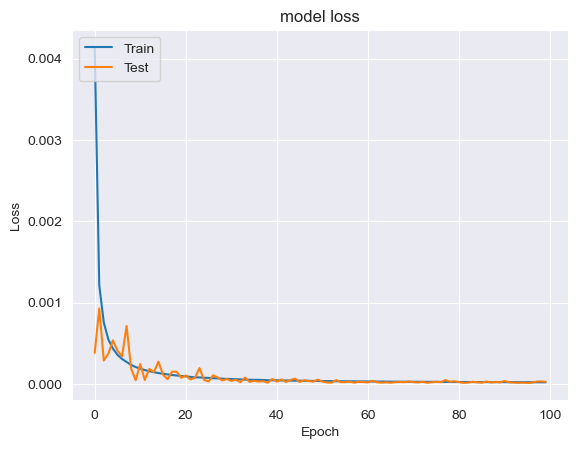

In [142]:
plot_his(history_12)

In [143]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 7s 1ms/step - loss: 2.5023e-05 - rmse: 2.9347e-05 - mae: 2.5023e-05 - mse: 8.6126e-10 - mape: 0.0087


[2.5023404305102304e-05,
 2.934725307568442e-05,
 2.5023404305102304e-05,
 8.61261229001542e-10,
 0.00866332370787859]

In [144]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 6s 984us/step


# Results and Discussions

In [147]:
AIC_value(model_1,Y_pred_1,Y_test)
AIC_value(model_2,Y_pred_2,Y_test)
AIC_value(model_3,Y_pred_3,Y_test)
AIC_value(model_4,Y_pred_4,Y_test)
AIC_value(model_5,prediction_5,Y_test)
AIC_value(model_6,prediction_6,Y_test)
AIC_value(model_7,prediction_7[:198976],Y_test)
AIC_value(model_8,prediction_8,Y_test)
AIC_value(model_9,prediction_9,Y_test)
AIC_value(model_10,prediction_10,Y_test)
AIC_value(model_11,prediction_11,Y_test)
AIC_value(model_12,prediction_12,Y_test)


AIC:  10161.582
AIC:  11601.582
AIC:  9121.582
AIC:  23941.582
AIC:  25701.582
AIC:  65841.58
AIC:  11200.341
AIC:  65841.586
AIC:  741.5822
AIC:  2361.582
AIC:  11713.582
AIC:  1557.5822


In [ ]:
rmse_score = { 'DNN_1':0.000124903,'DNN_2':0.001580797,'DNN_3':0.00024606,'DNN_4':0.00165169,'CNN_1':0.00030274,
              'CNN_2':0.00024752,'CNN_3_X':0.0001937482,'CNN_4':0.00024752,'LSTM_1':0.0001818,
             'LSTM_2':0.000358092, 'LSTM_3':0.00108152, 'LSTM_4':0.000430131 }
names = list(rmse_score.keys())
values = list(rmse_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RMSE')
plt.show()

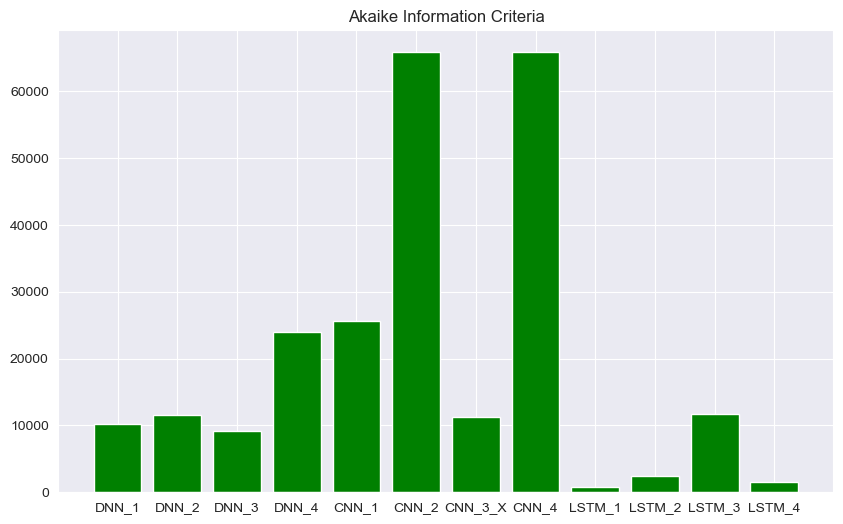

In [148]:
AIC_score = { 'DNN_1':10161.582,'DNN_2':11601.582,'DNN_3':9121.582,'DNN_4':23941.582,'CNN_1':25701.582,
              'CNN_2':65841.58,'CNN_3_X':11200.341,'CNN_4':65841.586,'LSTM_1':741.5822,
             'LSTM_2':2361.582, 'LSTM_3':11713.582, 'LSTM_4':1557.5822 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()